# Song Rec Sys


- We focus on content-based filtering.
- Compute similarity between songs using techniques like cosine similarity.
- And then make it dyanmic by adding user data
- Recommend songs similar to those a user has already liked and then use collaborative filtering and then use hybrid model





In [2]:
file_path = 'spotify_data/train.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#turn into a pandas dataframe
data = pd.read_csv(file_path)
data.shape

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


(129172, 19)

In [3]:
# I wanna only take a smaller subset of the data to make it easier to work with
data = data.sample(frac=0.05, random_state=1)
data.shape

(6459, 19)

In [4]:
#I wanna get 10 songs which are top popular
data_x = data.sort_values(by='popularity', ascending=False)


In [5]:
data_x.head(20)

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
1976,2XIc1pqjXV3Cr2BQUGNBck,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,2020,0.03030,0.856,203201,0.618,0,0.000000,7,0.0866,-4.892,1,2020-11-27,0.2860,81.993,0.391,94
55609,7uoFMmxln0GPXQ0AcCBXRq,['Sia'],Snowman,2018,0.48300,0.716,165907,0.512,0,0.000000,1,0.0928,-6.257,1,2018-11-01,0.0331,104.957,0.326,91
22310,285pBltuF7vW8TeWk8hdRR,['Juice WRLD'],Lucid Dreams,2018,0.34900,0.511,239836,0.566,1,0.000000,6,0.3400,-7.230,0,2018-12-10,0.2000,83.903,0.218,88
96442,0rKtyWc8bvkriBthvHKY8d,['Joji'],SLOW DANCING IN THE DARK,2018,0.54400,0.515,209274,0.479,1,0.005980,3,0.1910,-7.458,1,2018-10-26,0.0261,88.964,0.284,84
17982,4K8cyoCDovlc4FvtUr2Hfx,"['Cali Y El Dandee', 'Danna Paola']",Nada,2020,0.05180,0.684,174027,0.808,0,0.000010,0,0.0858,-2.737,1,2020-08-14,0.0610,173.905,0.712,83
16800,78qd8dvwea0Gosb6Fe6j3k,['Doja Cat'],Boss Bitch,2020,0.12700,0.707,134240,0.955,0,0.000000,10,0.2020,-4.593,0,2020-01-23,0.2220,125.989,0.575,83
21528,66W1rVTnEv86dIkFhoiElg,"['Regard', 'RAYE']",Secrets,2020,0.04120,0.848,176767,0.768,1,0.000785,6,0.1950,-5.386,0,2020-04-24,0.0373,118.961,0.777,82
69886,2374M0fQpWi3dLnB54qaLX,['TOTO'],Africa,1982,0.25700,0.671,295893,0.373,0,0.000080,9,0.0481,-18.064,1,1982-04-08,0.0323,92.718,0.732,82
67722,5DoLhdU27owX1NMrKLUbUl,"['Super Yei', 'Towy', 'Osquel', 'Beltito', 'Sa...","Lean (feat. Towy, Osquel, Beltito & Sammy & Fa...",2017,0.11100,0.863,260545,0.669,1,0.000000,6,0.0569,-5.952,0,2017-03-31,0.2820,164.062,0.947,82
112361,7LVHVU3tWfcxj5aiPFEW4Q,['Coldplay'],Fix You,2005,0.16400,0.209,295533,0.417,0,0.001960,3,0.1130,-8.740,1,2005-06-07,0.0338,138.178,0.124,81


In [6]:
data

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
105706,5ecmXyYSyzVH0YW6L9JFWI,['Workout Music '],Bad Liar (Cardio + Running Workout Mix),2020,0.015500,0.546,220532,0.885,0,0.000249,8,0.1110,-4.818,1,2020-12-23,0.1710,160.053,0.630,7
43634,5L0R973DXyyHBCusBp0xbp,"['Gene Kelly', 'Debbie Reynolds', ""Donald O'Co...",Main Title (Singin' In The Rain),1952,0.856000,0.268,103280,0.433,0,0.032500,7,0.1810,-10.226,0,1952-04-11,0.0352,75.933,0.372,8
92308,7Ll2qd2GHRl4iX2HZYgS9W,['Antonio Aguilar'],La Recién Casada,1988,0.530000,0.662,140557,0.408,0,0.000007,5,0.1500,-8.881,1,1988-01-01,0.0820,126.056,0.956,38
41407,3DytidwwDXv5gZVilj2lO1,['ABBA'],Lovelight,1979,0.111000,0.559,228133,0.720,0,0.000105,0,0.3280,-5.948,1,1979,0.0302,125.139,0.683,25
95655,08Px3e9b35UkrpFlRkxH3l,['Andrea Bocelli'],The Power Of Love,1995,0.524000,0.540,306456,0.599,0,0.001210,3,0.0692,-7.132,1,1995-01-01,0.0359,138.079,0.292,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43985,50qma2LfxTfAILyNlZEnpP,"[""Guns N' Roses""]",Sweet Child O' Mine,1987,0.090100,0.446,356067,0.952,0,0.085700,6,0.1120,-5.321,1,1987-07-29,0.0523,125.303,0.624,42
27597,7MUO72DucIUaSVlPho4Sx3,['YELLOW MAGIC ORCHESTRA'],ファイアークラッカー,1979,0.167000,0.707,292507,0.964,0,0.515000,2,0.0612,-2.046,1,1979,0.0379,119.938,0.971,30
9806,7KGbYZv593eAMISQjYqTDT,['AC/DC'],I Put the Finger on You,1981,0.000167,0.483,205707,0.980,0,0.664000,9,0.1690,-4.033,1,1981-11-23,0.0632,133.816,0.759,40
129087,0lzhlzzrCSRSmm7TDpAG8f,['K-Rino'],The Set Up,2003,0.170000,0.696,275120,0.837,1,0.000000,1,0.0618,-9.426,0,2003-06-29,0.2320,158.846,0.873,2


# Data Preprocessing
## Check for missing values

In [7]:
# Check for missing values coded as NA or -1 or empty string
missing_values = data.isin(['NA', -1, ''])
if missing_values.any().any():
    print("Missing values detected:")
    print(data[missing_values.any(axis=1)])
else:
    print("No missing values detected.")

No missing values detected.


 ## Normalize
Next we will normalize our data using min,max normalization  $X_n = \frac{x-min_x}{max_x-min_x}$

In [8]:
# drop columns with categorical data
non_categorical_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'popularity']
df_non_categorical = data[non_categorical_columns]
norm_data = (df_non_categorical-df_non_categorical.min())/(df_non_categorical.max()-df_non_categorical.min())
norm_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
105706,0.015561,0.560000,0.085064,0.885867,0.000250,0.727273,0.096085,0.868600,1.0,0.176107,0.726879,0.634441,0.074468
43634,0.859438,0.274872,0.036840,0.433340,0.032598,0.636364,0.167260,0.739209,0.0,0.036251,0.344849,0.374622,0.085106
92308,0.532128,0.678974,0.052172,0.408311,0.000007,0.454545,0.135740,0.771390,1.0,0.084449,0.572482,0.962739,0.404255
41407,0.111445,0.573333,0.088190,0.720675,0.000105,0.000000,0.316726,0.841564,1.0,0.031102,0.568318,0.687815,0.265957
95655,0.526104,0.553846,0.120403,0.599534,0.001214,0.272727,0.053584,0.813236,1.0,0.036972,0.627085,0.294058,0.542553


## Pearson Correlation 

In [9]:
def highly_correlated_features(df, threshold):
    correlation_matrix = df.corr() # Calculate the correlation matrix
    
    features_to_drop = set()
    highly_correlated_pairs = []
    
    for i in range(correlation_matrix.shape[0]):
        for j in range(i+1, correlation_matrix.shape[1]):
            # If the absolute value of the correlation coefficient is above the threshold, add the feature to the set
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                features_to_drop.add(correlation_matrix.columns[j])
                highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

    return features_to_drop , highly_correlated_pairs

In [10]:
drop_features, correlated_pairs  = highly_correlated_features(norm_data, 0.8)


print("We can drop these Features:",drop_features)
print()
print("Correlated Pairs and their coefficient")
for i in correlated_pairs:
    print(i)

We can drop these Features: set()

Correlated Pairs and their coefficient


In [11]:
filtered_data = norm_data.drop(columns=drop_features) #none are dropped
filtered_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
105706,0.015561,0.560000,0.085064,0.885867,0.000250,0.727273,0.096085,0.868600,1.0,0.176107,0.726879,0.634441,0.074468
43634,0.859438,0.274872,0.036840,0.433340,0.032598,0.636364,0.167260,0.739209,0.0,0.036251,0.344849,0.374622,0.085106
92308,0.532128,0.678974,0.052172,0.408311,0.000007,0.454545,0.135740,0.771390,1.0,0.084449,0.572482,0.962739,0.404255
41407,0.111445,0.573333,0.088190,0.720675,0.000105,0.000000,0.316726,0.841564,1.0,0.031102,0.568318,0.687815,0.265957
95655,0.526104,0.553846,0.120403,0.599534,0.001214,0.272727,0.053584,0.813236,1.0,0.036972,0.627085,0.294058,0.542553


## Feature Importance to understand data better

Variable: acousticness         Importance: 0.26
Variable: speechiness          Importance: 0.14
Variable: instrumentalness     Importance: 0.09
Variable: loudness             Importance: 0.09
Variable: danceability         Importance: 0.07
Variable: duration_ms          Importance: 0.07
Variable: valence              Importance: 0.07
Variable: energy               Importance: 0.06
Variable: tempo                Importance: 0.06
Variable: liveness             Importance: 0.05
Variable: key                  Importance: 0.03
Variable: mode                 Importance: 0.01


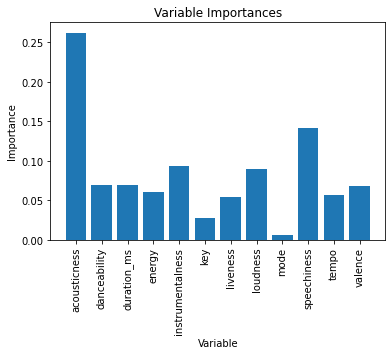

In [12]:
# do feature ranking and plot a historgram of the features vs importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

 #drop popularity
X = filtered_data.drop(columns=['popularity'])
y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

# Get numerical feature importances
importances = list(rf.feature_importances_)
feature_list = list(X.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
plt.show()


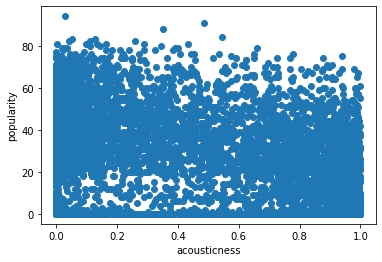

In [13]:
# What are some more plots I can make?
# I can make a scatter plot of the most important feature vs popularity
# I can make a scatter plot of the second most important feature vs popularity
# I can make a scatter plot of the third most important feature vs popularity

# make them 
plt.scatter(X[feature_importances[0][0]], y)
plt.xlabel(feature_importances[0][0])
plt.ylabel('popularity')
plt.show()


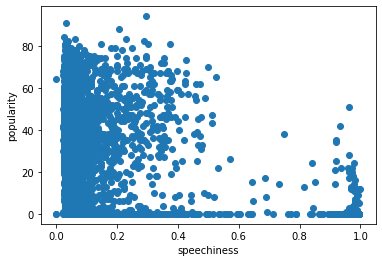

In [14]:
plt.scatter(X[feature_importances[1][0]], y)
plt.xlabel(feature_importances[1][0])
plt.ylabel('popularity')
plt.show()

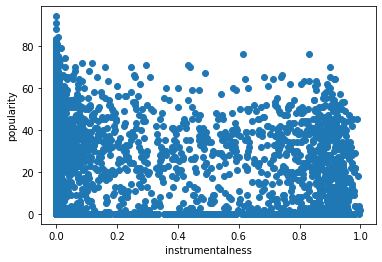

In [15]:
plt.scatter(X[feature_importances[2][0]], y)
plt.xlabel(feature_importances[2][0])
plt.ylabel('popularity')
plt.show()

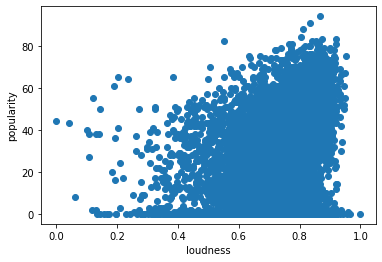

In [16]:
plt.scatter(X[feature_importances[3][0]], y)
plt.xlabel(feature_importances[3][0])
plt.ylabel('popularity')
plt.show()

### histogram of popularity

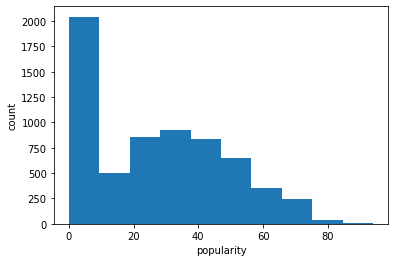

In [17]:
plt.hist(y)
plt.xlabel('popularity')
plt.ylabel('count')
plt.show()


/Users/syedalihaider/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/syedalihaider/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/syedalihaider/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/syedalihaider/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

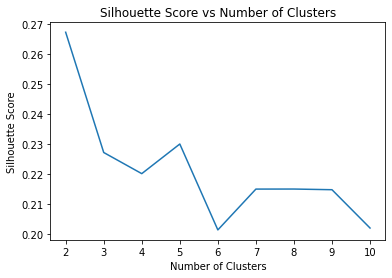

In [18]:
# Compute clsuters to do unsupervised learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a list to store the silhouette scores
silhouette_scores = []

# Create a list of different number of clusters to try
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Loop through each cluster
for n in n_clusters:
    # Create a KMeans object with n clusters and fit it to the data
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(filtered_data)
    
    # Calculate the silhouette score and append it to the list
    silhouette_scores.append(silhouette_score(filtered_data, kmeans.labels_))

# Plot the silhouette scores
plt.plot(n_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

/Users/syedalihaider/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/syedalihaider/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/syedalihaider/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/syedalihaider/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

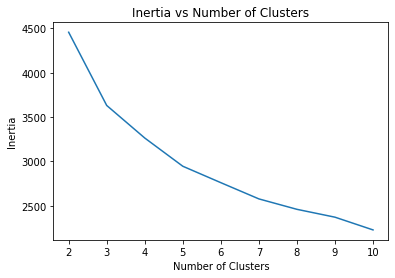

In [19]:
# also do elbow method
# Create a list to store the inertia values
inertia_values = []

# Loop through each cluster
for n in n_clusters:
    # Create a KMeans object with n clusters and fit it to the data
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(filtered_data)
    
    # Append the inertia to the list
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(n_clusters, inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()


/Users/syedalihaider/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


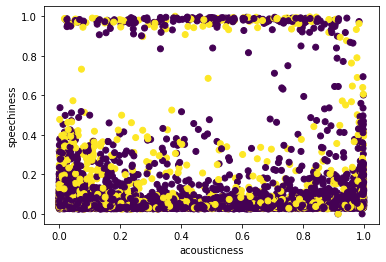

In [20]:
#create a KMeans object with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)

#fit the data to the model
kmeans.fit(filtered_data)

#add the cluster labels to the data
filtered_data['cluster'] = kmeans.labels_

# plt.show()
filtered_data

# I can make a scatter plot of the two most important features and color the points by cluster
plt.scatter(filtered_data[feature_importances[0][0]], filtered_data[feature_importances[1][0]], c=filtered_data['cluster'])
plt.xlabel(feature_importances[0][0])
plt.ylabel(feature_importances[1][0])
plt.show()


In [21]:
# compute cosine similarity with all the songs
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix
cosine_similarity_matrix = cosine_similarity(filtered_data)

# Create a DataFrame for the cosine similarity matrix
cosine_similarity_df = pd.DataFrame(cosine_similarity_matrix, index=filtered_data.index, columns=filtered_data.index)
cosine_similarity_df.head()

,105706,43634,92308,41407,95655,27270,17508,33301,63587,103957,...,712,67178,47414,16379,101198,43985,27597,9806,129087,48222
105706,1.000000,0.577623,0.901222,0.916374,0.888457,0.592792,0.928945,0.919316,0.671380,0.711375,...,0.926372,0.628591,0.630480,0.800554,0.945862,0.971795,0.910932,0.938303,0.703597,0.822565
43634,0.577623,1.000000,0.625602,0.507053,0.603100,0.790841,0.507954,0.585260,0.874740,0.825647,...,0.609282,0.528260,0.811616,0.516685,0.540629,0.572096,0.538965,0.560803,0.792495,0.689906
92308,0.901222,0.625602,1.000000,0.921299,0.929079,0.604490,0.938376,0.930662,0.698975,0.614113,...,0.936356,0.814557,0.612953,0.787331,0.873355,0.916908,0.913239,0.870874,0.681397,0.889488
41407,0.916374,0.507053,0.921299,1.000000,0.919165,0.628047,0.974605,0.884750,0.649964,0.581337,...,0.855099,0.759544,0.565450,0.715093,0.896861,0.942465,0.949498,0.874039,0.706468,0.769533
95655,0.888457,0.603100,0.929079,0.919165,1.000000,0.668233,0.917522,0.940416,0.711171,0.642640,...,0.891122,0.873103,0.569928,0.778211,0.844911,0.932924,0.885114,0.856299,0.623007,0.889261


# Collab filtering with cosine similarity

In [22]:
data_new = data.drop(columns=drop_features)
data_new.head()

# Create a function to get recommendations based on the cosine similarity matrix
def get_recommendations(song_title, cosine_similarity_df, data):
    # Get the index of the song
    song_index = data[data['name'] == song_title].index[0]
    
    # Get the similarity scores of the song
    similarity_scores = cosine_similarity_df[song_index]
    
    # Get the indices of the songs with the highest similarity scores
    similar_songs = similarity_scores.sort_values(ascending=False).index[1:6]
    
    # return like this: Index: 1, Name: 'song name', Artists: 'artist name'
    recommended_songs = []
    for i in similar_songs:
        recommended_songs.append({'Index': i, 'Name': data['name'][i], 'Artists': data['artists'][i]})
    
    return recommended_songs

## Test the function

In [23]:
# Get recommendations for the song 'SLovelight' by ABBA
song = 'The Set Up'
recommendations = get_recommendations(song, cosine_similarity_df, data_new)
print(f"Since you listened to {song}, you might also like:")
for i in recommendations:
    print('Index:', i['Index'], 'Name:', i['Name'], ' By:', i['Artists'])


Since you listened to The Set Up, you might also like:
Index: 37307 Name: I Can Make It Better  By: ['The Whispers']
Index: 70457 Name: Ten years look young 2017  By: ['Two Hundred Road']
Index: 50698 Name: If You're Not Scared  By: ["K's Choice"]
Index: 24647 Name: Woke Up This Morning  By: ['Alabama 3']
Index: 22979 Name: Salió El Sol  By: ['Don Omar']


- we need to make the user sign up on our database first before we can recommend songs to them
- we can use the user's listening history to recommend songs to them
- we can also add a feature to allow the user to rate the recommended songs
- we can also add a feature to allow the user to search for songs and artists

# Create user profile

In [24]:
def generate_unique_user_id(user_data):
    while True:
        user_id = np.random.randint(100000, 999999)
        if user_id not in user_data['user_id'].values:
            return user_id

def user_signup(user_data, user_name, user_email, user_password):
    user_id = generate_unique_user_id(user_data)
    new_user = pd.DataFrame({'user_id': [user_id], 'user_name': [user_name], 'user_email': [user_email], 'user_password': [user_password]})
    user_data = pd.concat([user_data, new_user], ignore_index=True)
    print("User signed up successfully!")
    return user_data

def user_login(user_data, user_email, user_password):
    user = user_data[(user_data['user_email'] == user_email) & (user_data['user_password'] == user_password)]
    if user.empty:
        print("Invalid email or password. Please try again.")
        return None
    else:
        print("User logged in successfully!")
        return user.iloc[0]['user_id']

def add_to_database(user_data, user_id, user_name, user_email, user_password):
    new_user = pd.DataFrame({'user_id': [user_id], 'user_name': [user_name], 'user_email': [user_email], 'user_password': [user_password]})
    user_data = pd.concat([user_data, new_user], ignore_index=True)
    return user_data

def rate_song(user_id, song_index, rating, ratings_data):
    new_rating = pd.DataFrame({'user_id': [user_id], 'song_index': [song_index], 'rating': [rating]})
    ratings_data = pd.concat([ratings_data, new_rating], ignore_index=True)
    print("Song rated successfully!")
    return ratings_data

def search_song(song_name, data):
    search_results = data[data['name'].str.contains(song_name, case=False)]
    if search_results.empty:
        print("No matching songs found.")
    else:
        print("Matching songs found:")
        print(search_results[['name', 'artists']])
    return search_results

## Test user profile

In [25]:
# Initialize user data
user_data = pd.DataFrame(columns=['user_id', 'user_name', 'user_email', 'user_password'])

# sign up 
user_name = "John Doe"
user_email = "john@example.com"
user_password = "password123"
user_data = user_signup(user_data, user_name, user_email, user_password)

User signed up successfully!


In [26]:
# Log in 
user_email = "john@example.com"
user_password = "password123"
user_id = user_login(user_data, user_email, user_password)

User logged in successfully!


In [27]:
user_data

,user_id,user_name,user_email,user_password
0,660827,John Doe,john@example.com,password123


In [28]:
# # Initialize ratings data
ratings_data = pd.DataFrame(columns=['user_id', 'song_index', 'rating'])

# Rate a song
user_id = user_data[user_data['user_email'] == user_email]['user_id'].values[0] 
song_index = 247933
rating = 5 
ratings_data = rate_song(user_id, song_index, rating, ratings_data)

Song rated successfully!


In [29]:
ratings_data

,user_id,song_index,rating
0,660827,247933,5


In [30]:
# search for a song
song_name = "The Set Up" 
search_results = search_song(song_name, data)

Matching songs found:
              name     artists
129087  The Set Up  ['K-Rino']
